In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
start = time.perf_counter()

# Parametry fizyczne
hbar = 1.0
m = 1.0

# Siatka przestrzenna
N = 2**13
x_max = 10.0
x = np.linspace(-x_max, x_max, N)
dx = x[1] - x[0]

# Operator Laplace’a (druga pochodna)
diag = -2.0 * np.ones(N)
off_diag = 1.0 * np.ones(N - 1)
T = (np.diag(diag) + np.diag(off_diag, +1) + np.diag(off_diag, -1)) / dx**2

# Potencjał studni kwadratowej
V = np.full(N, 5)  # bardzo duża wartość domyślnie
mask = (x > -1) & (x < 1)
V[mask] = 0       # studnia potencjału
V_matrix = np.diag(V)

# Hamiltonian
H = -(hbar**2 / (2 * m)) * T + V_matrix

# Rozwiązanie zagadnienia własnego
energies, wavefuncs = np.linalg.eigh(H)

end = time.perf_counter()
print(f"Czas działania: {end - start:.6f} sekundy")

Czas działania: 67.150290 sekundy


Najniższe energie własne:
E_0 = 0.702453
E_1 = 2.683864
E_2 = 5.004721


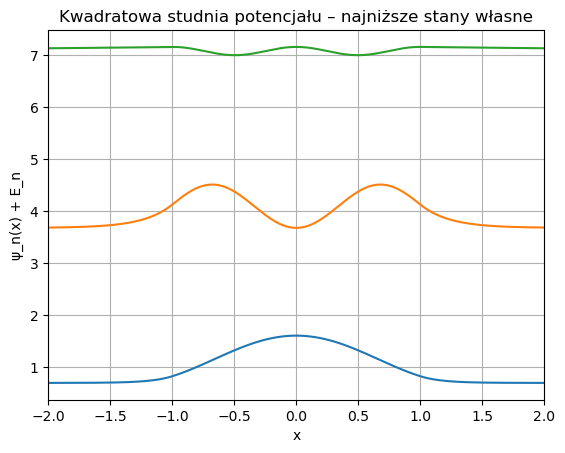

In [2]:
# Najniższe energie
print("Najniższe energie własne:")
for i in range(3):
    print(f"E_{i} = {energies[i]:.6f}")

# Normalizuję i rysuję funkcje falowe
for i in range(3):
    plt.plot(x, 500*np.abs(wavefuncs[:, i])**2 + energies[i] + i)       # ψ_n przesunięta w pionie
plt.title("Kwadratowa studnia potencjału – najniższe stany własne")
plt.xlabel("x")
plt.ylabel("ψ_n(x) + E_n")
plt.grid()
plt.xlim(-2,2)
plt.show()


In [3]:
np.save("funkcje psi(E) dla studni kwadratowej skończonej 1D FD.npy", wavefuncs[:, 0:3])

(-2.0, 2.0)

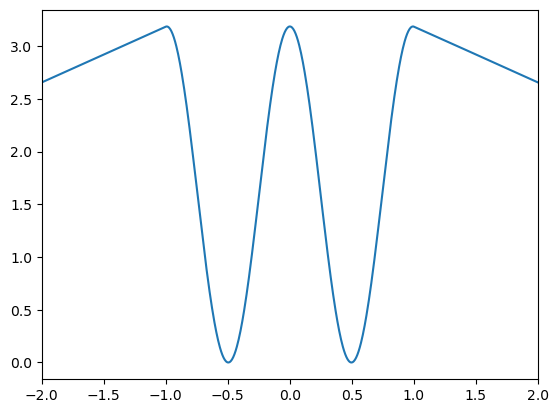

In [36]:
plt.plot(x, 5000*np.abs(wavefuncs[:, 2])**2)
plt.xlim(-2,2)

In [35]:
wavefuncs

array([[ 2.22484669e-15, -3.40583262e-12,  1.55253171e-05, ...,
        -7.53083416e-05, -3.76885282e-05,  3.76741864e-05],
       [ 4.45014954e-15, -6.81204064e-12,  3.10506308e-05, ...,
         1.50615867e-04,  7.53769541e-05, -7.53482708e-05],
       [ 6.67636481e-15, -1.02190027e-11,  4.65759378e-05, ...,
        -2.25921762e-04, -1.13065176e-04,  1.13022151e-04],
       ...,
       [ 6.67636480e-15,  1.02190026e-11,  4.65759378e-05, ...,
         2.25921762e-04, -1.13065176e-04, -1.13022151e-04],
       [ 4.45014954e-15,  6.81204112e-12,  3.10506308e-05, ...,
        -1.50615867e-04,  7.53769541e-05,  7.53482708e-05],
       [ 2.22484669e-15,  3.40583224e-12,  1.55253171e-05, ...,
         7.53083416e-05, -3.76885282e-05, -3.76741864e-05]],
      shape=(4096, 4096))